In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
from random import sample
from matplotlib import pyplot as plt

In [2]:
master_cat = Table.read('spectra-fitting.fits')

In [3]:
master_cat

field,id,ra,dec,ninput,redshift,t_g102,t_g141,t_g800l,n_g102,n_g141,n_g800l,p_g102,p_g141,p_g800l,numlines,haslines,chi2poly,chi2spl,splf01,sple01,splf02,sple02,splf03,sple03,splf04,sple04,huberdel,st_df,st_loc,st_scl,as_epsf,dof,chimin,chimax,bic_poly,bic_spl,bic_temp,z02,z16,z50,z84,z97,zwidth1,zwidth2,zrmin,zrmax,z_map,z_risk,min_risk,vel_bl,vel_nl,vel_z,vel_nfev,vel_flag,d4000,d4000_e,dn4000,dn4000_e,beam_chi2poly,beam_chi2spl,beam_splf01,beam_sple01,beam_splf02,beam_sple02,beam_splf03,beam_sple03,beam_splf04,beam_sple04,beam_huberdel,beam_st_df,beam_st_loc,beam_st_scl,beam_as_epsf,beam_dof,beam_chimin,beam_chimax,beam_bic_poly,beam_bic_spl,beam_bic_temp,beam_z02,beam_z16,beam_z50,beam_z84,beam_z97,beam_zwidth1,beam_zwidth2,beam_zrmin,beam_zrmax,beam_z_map,beam_z_risk,beam_min_risk,beam_vel_bl,beam_vel_nl,beam_vel_z,beam_vel_nfev,beam_vel_flag,beam_d4000,beam_d4000_e,beam_dn4000,beam_dn4000_e,dlineid,dlinesn,flux_BrA,err_BrA,ew50_BrA,ewhw_BrA,flux_BrB,err_BrB,ew50_BrB,ewhw_BrB,flux_BrG,err_BrG,ew50_BrG,ewhw_BrG,flux_PfG,err_PfG,ew50_PfG,ewhw_PfG,flux_PfD,err_PfD,ew50_PfD,ewhw_PfD,flux_PaA,err_PaA,ew50_PaA,ewhw_PaA,flux_PaB,err_PaB,ew50_PaB,ewhw_PaB,flux_PaG,err_PaG,ew50_PaG,ewhw_PaG,flux_PaD,err_PaD,ew50_PaD,ewhw_PaD,flux_HeI-1083,err_HeI-1083,ew50_HeI-1083,ewhw_HeI-1083,flux_SIII,err_SIII,ew50_SIII,ewhw_SIII,flux_OII-7325,err_OII-7325,ew50_OII-7325,ewhw_OII-7325,flux_ArIII-7138,err_ArIII-7138,ew50_ArIII-7138,ewhw_ArIII-7138,flux_SII,err_SII,ew50_SII,ewhw_SII,flux_Ha,err_Ha,ew50_Ha,ewhw_Ha,flux_OI-6302,err_OI-6302,ew50_OI-6302,ewhw_OI-6302,flux_HeI-5877,err_HeI-5877,ew50_HeI-5877,ewhw_HeI-5877,flux_OIII,err_OIII,ew50_OIII,ewhw_OIII,flux_Hb,err_Hb,ew50_Hb,ewhw_Hb,flux_OIII-4363,err_OIII-4363,ew50_OIII-4363,ewhw_OIII-4363,flux_Hg,err_Hg,ew50_Hg,ewhw_Hg,flux_Hd,err_Hd,ew50_Hd,ewhw_Hd,flux_H7,err_H7,ew50_H7,ewhw_H7,flux_H8,err_H8,ew50_H8,ewhw_H8,flux_H9,err_H9,ew50_H9,ewhw_H9,flux_H10,err_H10,ew50_H10,ewhw_H10,flux_NeIII-3867,err_NeIII-3867,ew50_NeIII-3867,ewhw_NeIII-3867,flux_OII,err_OII,ew50_OII,ewhw_OII,flux_NeVI-3426,err_NeVI-3426,ew50_NeVI-3426,ewhw_NeVI-3426,flux_NeV-3346,err_NeV-3346,ew50_NeV-3346,ewhw_NeV-3346,flux_MgII,err_MgII,ew50_MgII,ewhw_MgII,flux_CIV-1549,err_CIV-1549,ew50_CIV-1549,ewhw_CIV-1549,flux_CIII-1906,err_CIII-1906,ew50_CIII-1906,ewhw_CIII-1906,flux_CIII-1908,err_CIII-1908,ew50_CIII-1908,ewhw_CIII-1908,flux_OIII-1663,err_OIII-1663,ew50_OIII-1663,ewhw_OIII-1663,flux_HeII-1640,err_HeII-1640,ew50_HeII-1640,ewhw_HeII-1640,flux_NIII-1750,err_NIII-1750,ew50_NIII-1750,ewhw_NIII-1750,flux_NIV-1487,err_NIV-1487,ew50_NIV-1487,ewhw_NIV-1487,flux_NV-1240,err_NV-1240,ew50_NV-1240,ewhw_NV-1240,flux_Lya,err_Lya,ew50_Lya,ewhw_Lya,flux_040,err_040,ew50_040,ewhw_040,flux_041,err_041,ew50_041,ewhw_041,flux_042,err_042,ew50_042,ewhw_042,flux_043,err_043,ew50_043,ewhw_043,flux_044,err_044,ew50_044,ewhw_044,flux_045,err_045,ew50_045,ewhw_045,flux_046,err_046,ew50_046,ewhw_046,flux_047,err_047,ew50_047,ewhw_047,flux_048,err_048,ew50_048,ewhw_048,flux_049,err_049,ew50_049,ewhw_049,flux_050,err_050,ew50_050,ewhw_050,flux_051,err_051,ew50_051,ewhw_051,flux_052,err_052,ew50_052,ewhw_052,flux_053,err_053,ew50_053,ewhw_053,flux_054,err_054,ew50_054,ewhw_054,flux_055,err_055,ew50_055,ewhw_055,flux_056,err_056,ew50_056,ewhw_056,flux_057,err_057,ew50_057,ewhw_057,flux_058,err_058,ew50_058,ewhw_058,flux_059,err_059,ew50_059,ewhw_059,flux_060,err_060,ew50_060,ewhw_060,flux_061,err_061,ew50_061,ewhw_061,flux_062,err_062,ew50_062,ewhw_062,flux_063,err_063,ew50_063,ewhw_063,pdf_max,cdf_z,lv,mlv,mlv_rms,sfrv,sfrv_rms,ssfr,stellar_mass,sn_BrA,sn_BrB,sn_BrG,sn_PfG,sn_PfD,sn_PaA,sn_PaB,sn_PaG,sn_PaD,sn_HeI-1083,sn_SIII,sn_OII-7325,sn_ArIII-7138,sn_SII,sn_Ha,sn_OI-6302,sn_HeI-5877,sn_OIII,sn_Hb,sn_OIII-4363,sn_Hg,sn_Hd,sn_H7,sn_H8,sn_H9,sn_H10,sn_NeIII-3867,sn_OII,sn_NeVI-3426,sn_NeV-3346,sn_MgII,sn_CIV-1549,sn_CIII-1906,sn_CIII-1908,sn_OIII-1663,sn_HeII-1640,sn_NIII-1750,sn_NIV-1487,sn_NV-1240,sn_Lya,chinu,bic_diff,log_risk,log_pdf_max,zq,beam

data/leo-00/leo-00_01384.1D.fits


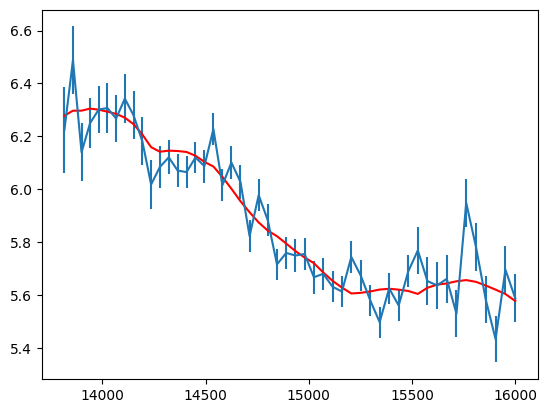

data/leo-00/leo-00_01819.1D.fits


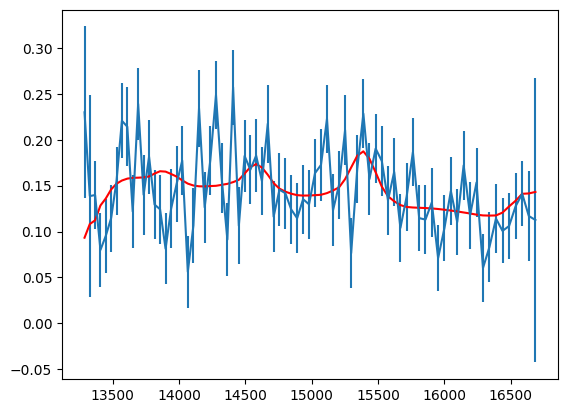

data/leo-00/leo-00_01105.1D.fits


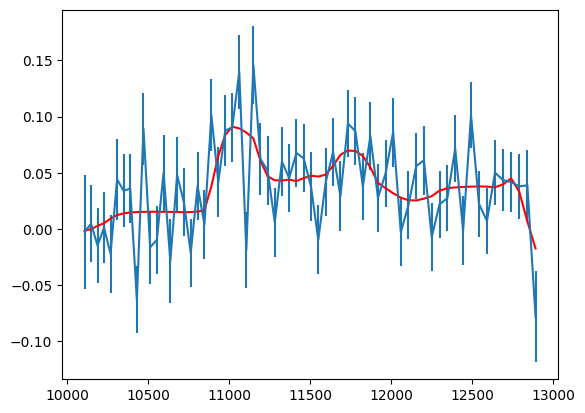

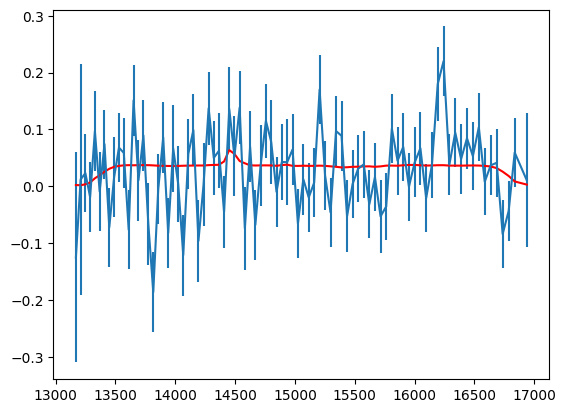

data/leo-00/leo-00_03374.1D.fits


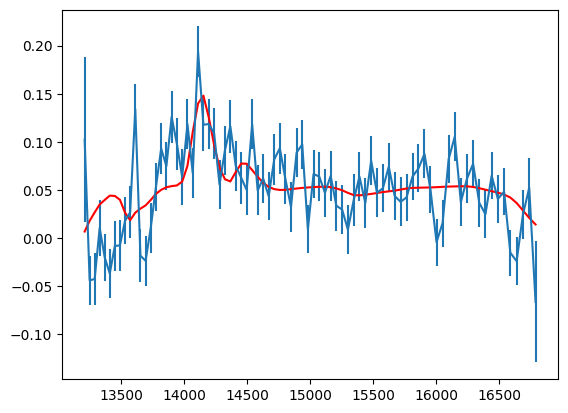

data/leo-00/leo-00_00210.1D.fits


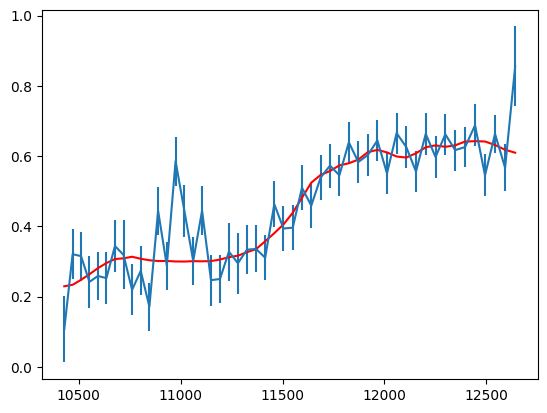

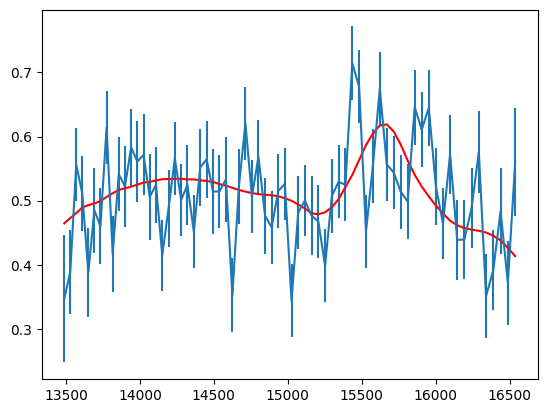

data/leo-00/leo-00_03764.1D.fits


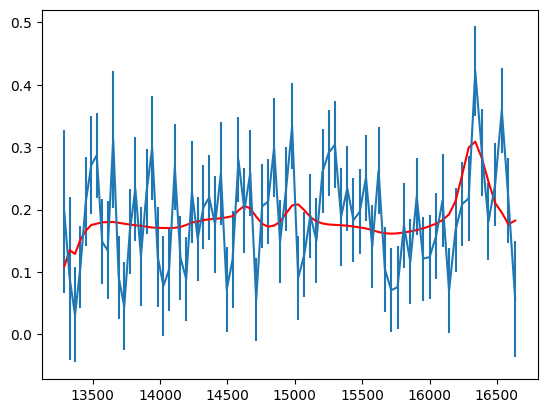

data/leo-00/leo-00_02100.1D.fits


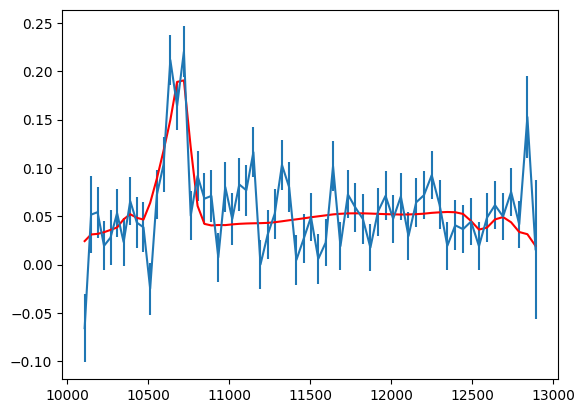

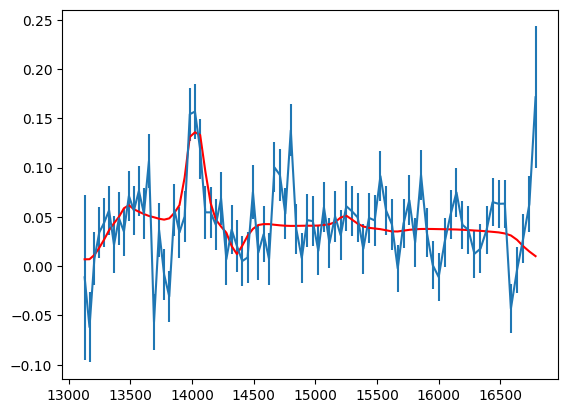

data/leo-00/leo-00_03443.1D.fits


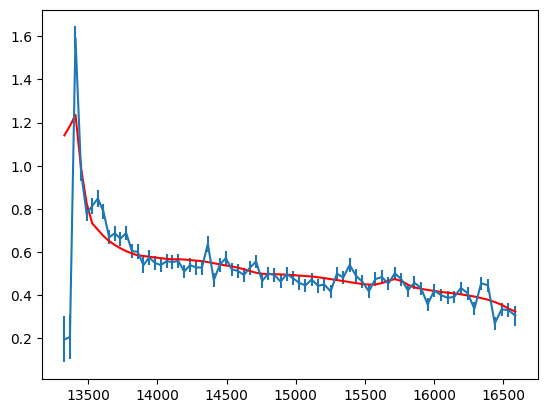

data/leo-00/leo-00_03968.1D.fits


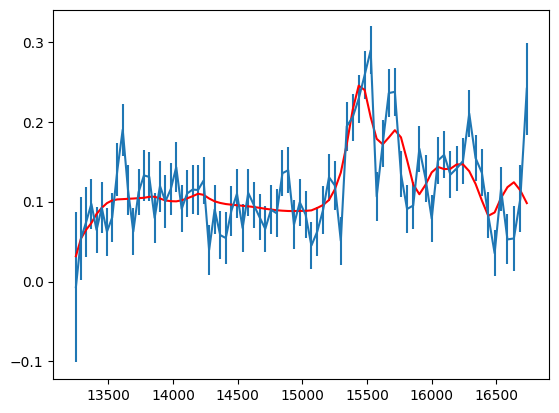

data/leo-00/leo-00_02120.1D.fits


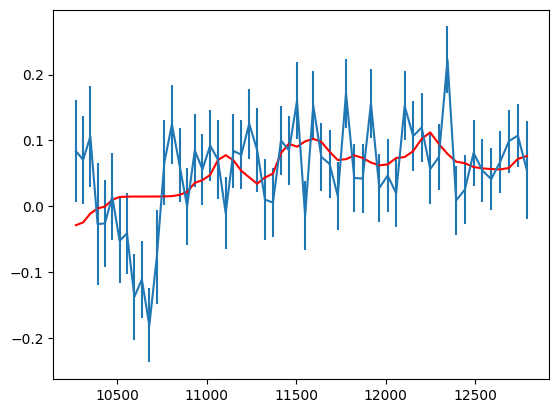

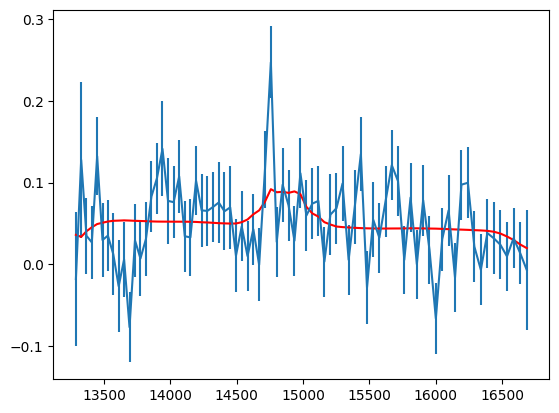

data/leo-00/leo-00_00041.1D.fits


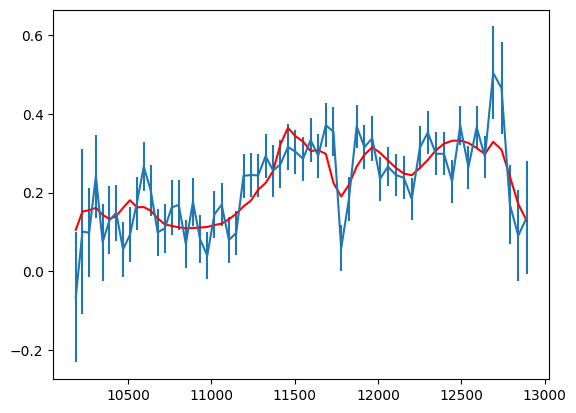

data/leo-00/leo-00_03415.1D.fits


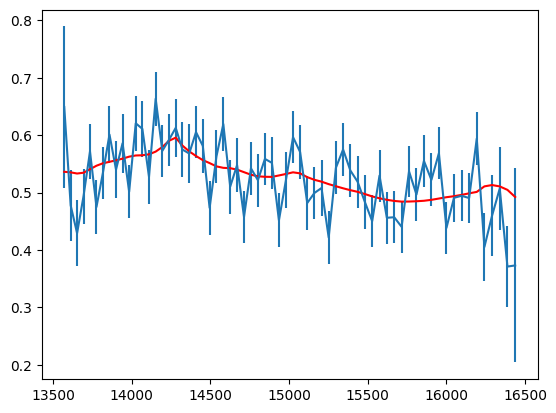

data/leo-00/leo-00_00902.1D.fits


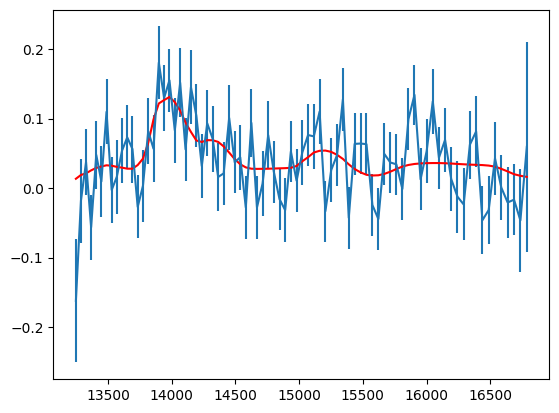

data/leo-00/leo-00_00496.1D.fits


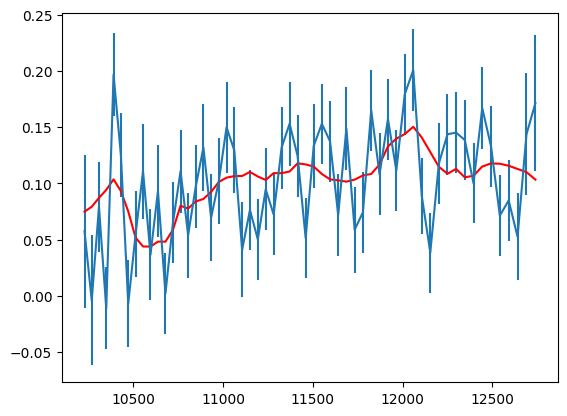

data/leo-00/leo-00_00093.1D.fits


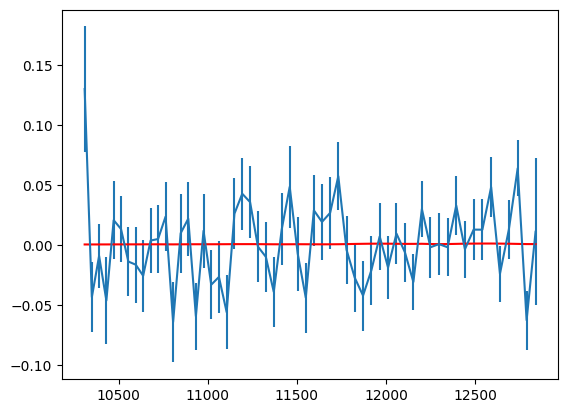

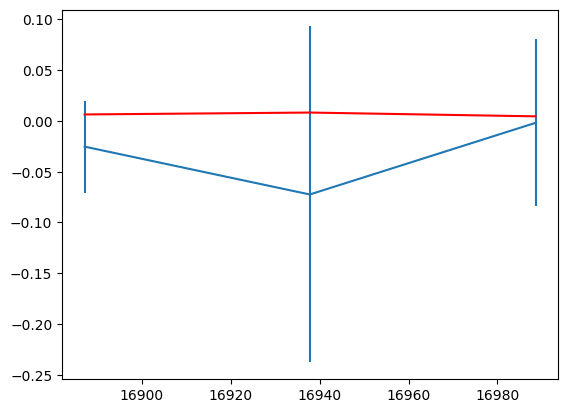

data/leo-00/leo-00_02459.1D.fits


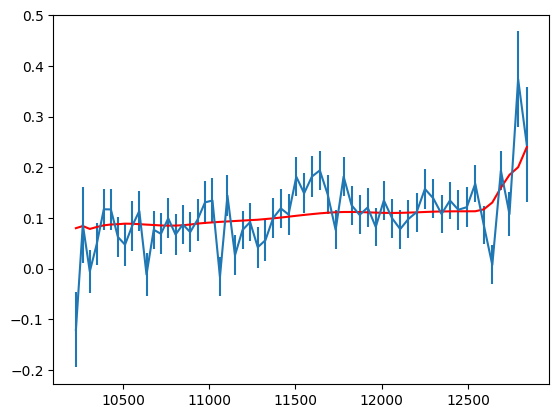

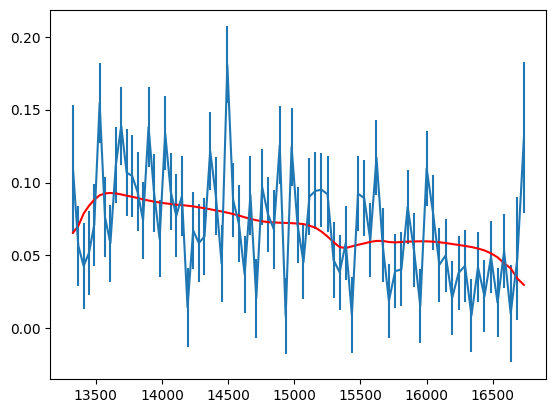

data/leo-00/leo-00_00277.1D.fits


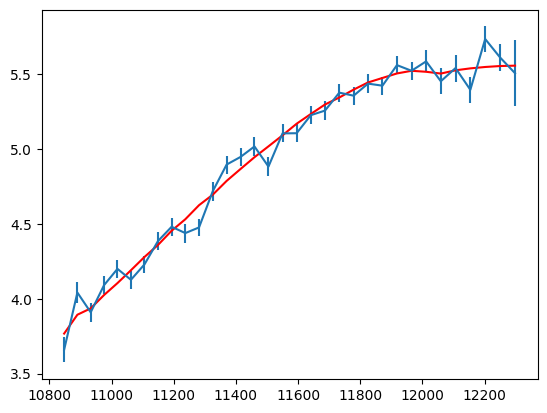

data/leo-00/leo-00_02081.1D.fits


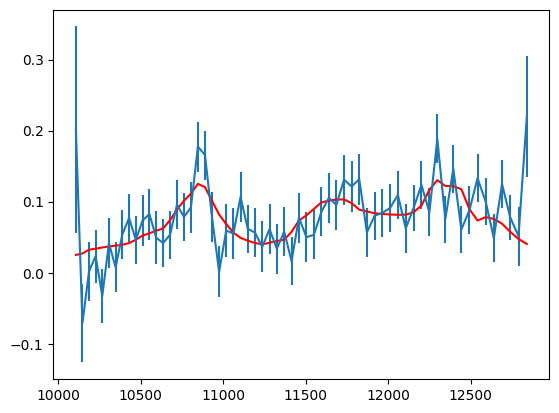

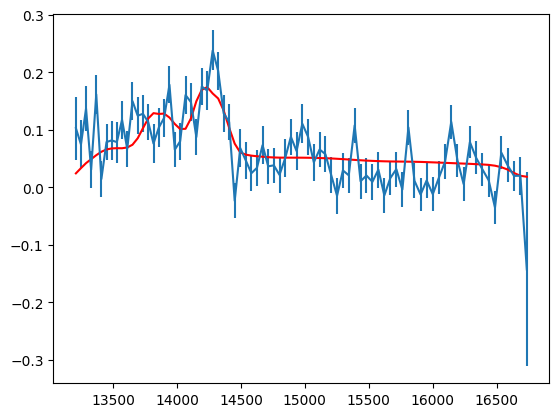

data/leo-00/leo-00_01100.1D.fits


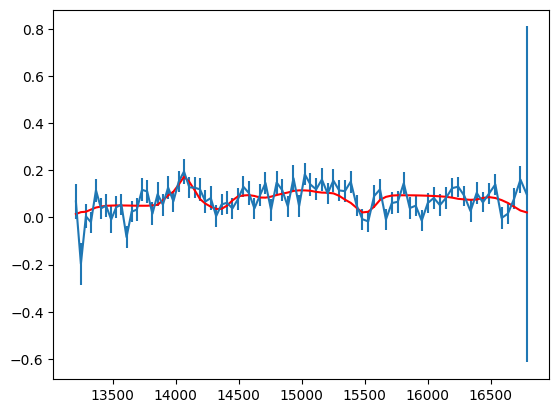

data/leo-00/leo-00_02642.1D.fits


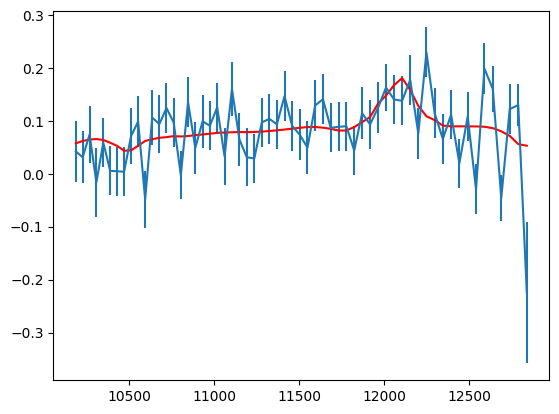

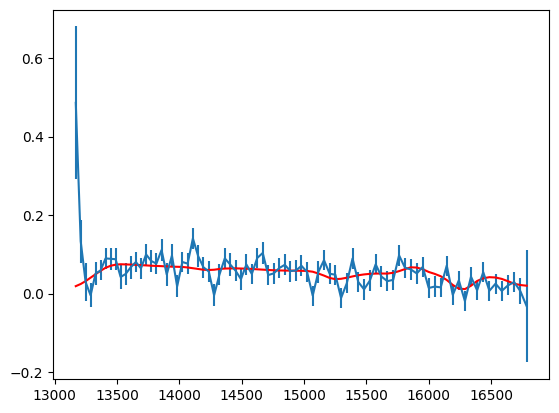

data/leo-00/leo-00_00529.1D.fits


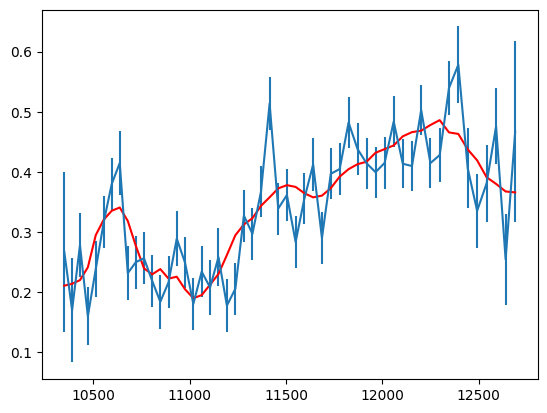

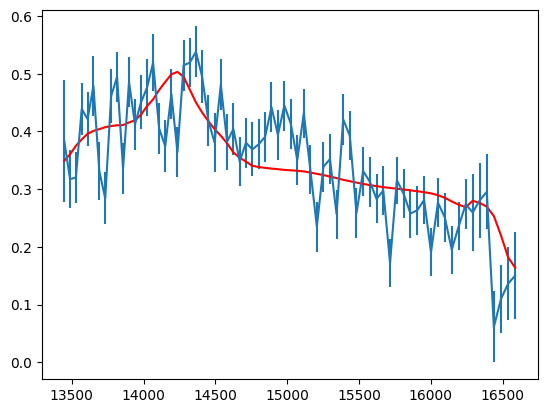

data/leo-00/leo-00_00056.1D.fits


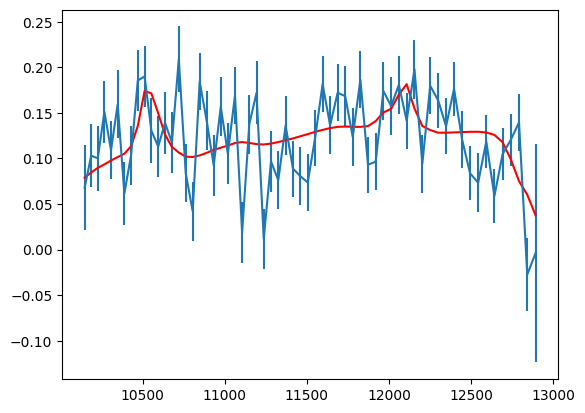

data/leo-00/leo-00_01213.1D.fits


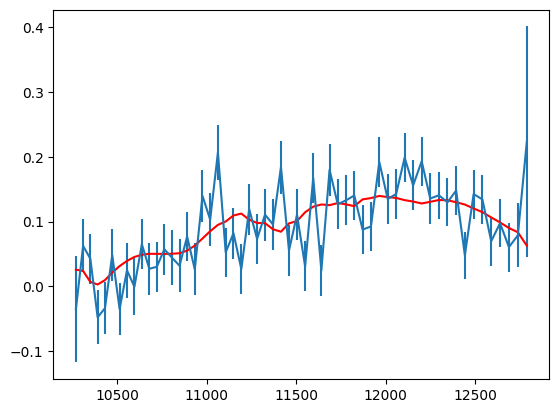

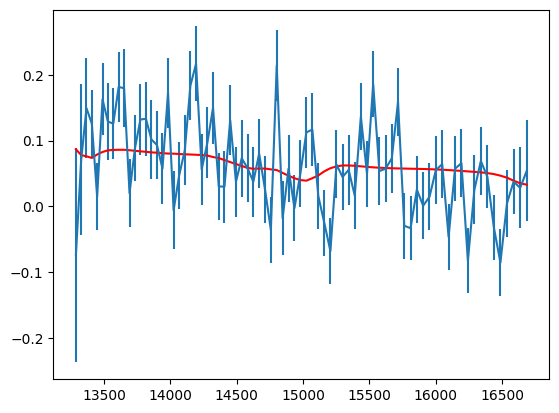

data/leo-00/leo-00_00991.1D.fits


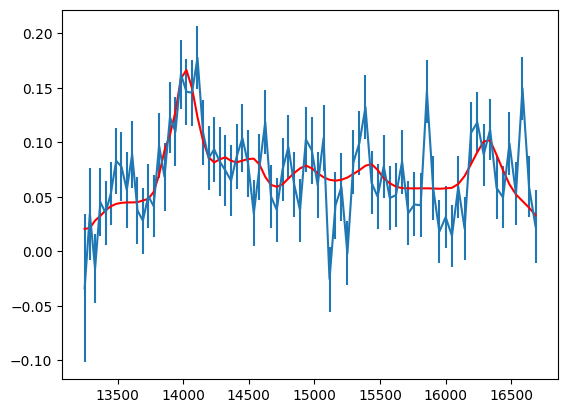

data/leo-00/leo-00_03303.1D.fits


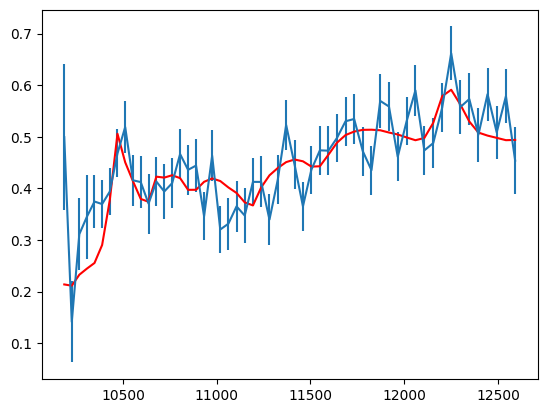

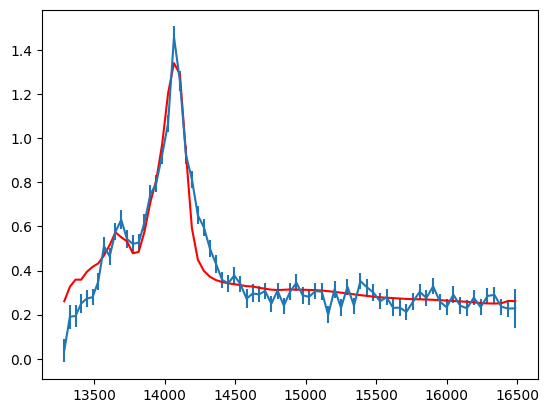

data/leo-00/leo-00_02495.1D.fits


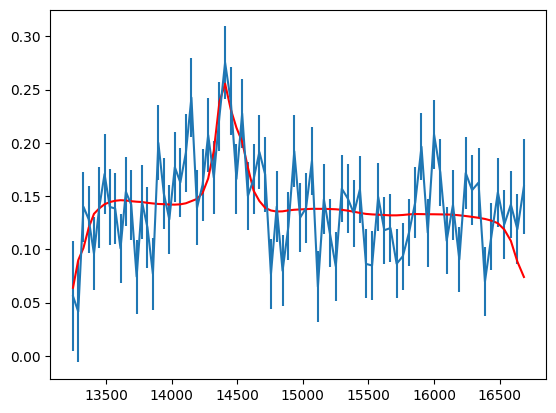

data/leo-00/leo-00_01814.1D.fits


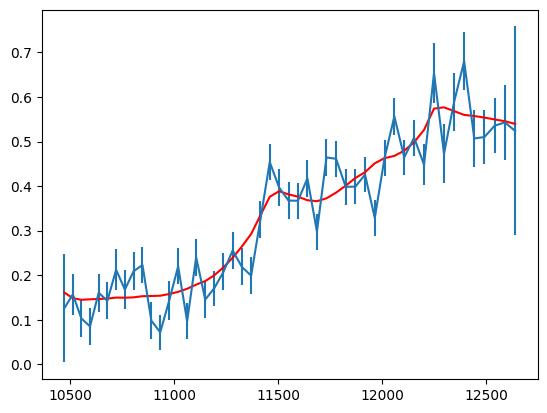

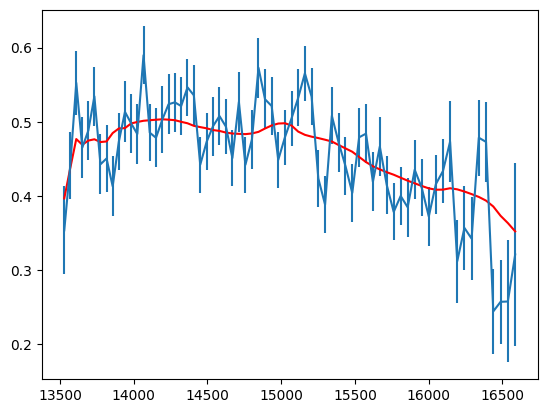

data/leo-00/leo-00_03616.1D.fits


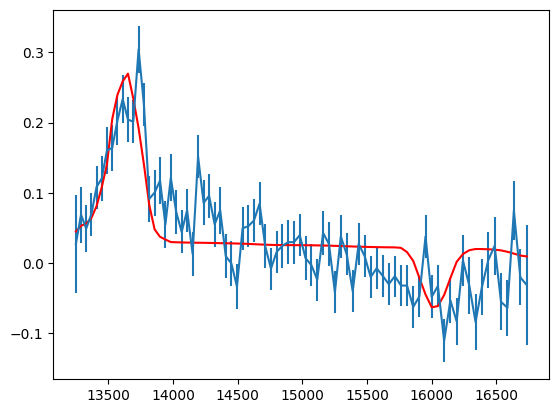

data/leo-00/leo-00_01147.1D.fits


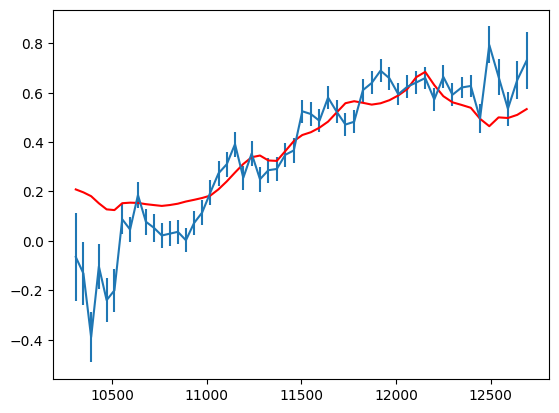

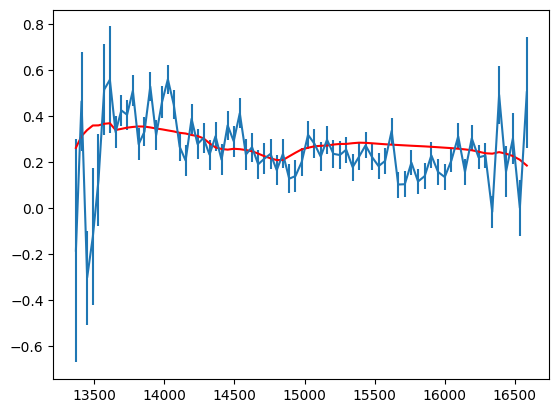

data/leo-00/leo-00_03987.1D.fits


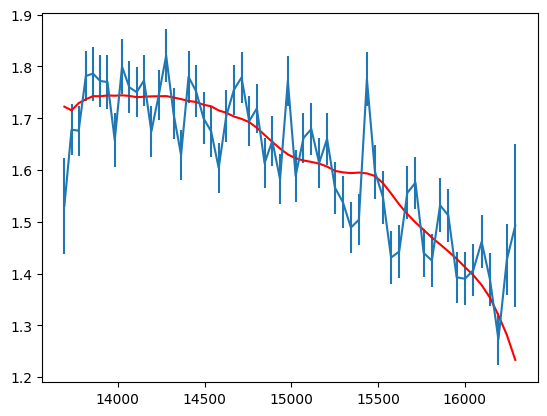

In [22]:
for obj in master_cat[sample(range(len(master_cat[master_cat['field']=='leo-00'])),30)]:
    data_path = f"data/{obj['field']}/{obj['field']}_{str(obj['id']).zfill(5)}.1D.fits"
    print(data_path)
    with fits.open(data_path) as hdul:
        for hdu in hdul:
            if hdu.name in ['F115W','F150W','F200W']:
                spec = Table(hdu.data)
                wave, flux, err, line = spec['wave'], spec['flux'], spec['err'], spec['line']
                mask = flux != 0
                wave, flux, err = wave[mask], flux[mask], err[mask]
                plt.errorbar(wave, flux, yerr=err)
                plt.plot(wave, line[mask], color='red')
                plt.show()
                

# 